# Machine Learning for Medicine: Workshop
## What is a distribution?

### Overview
Data is the way we study our patients. Whether its lab values, MRIs, our physical examination, or even our history taking, data is the window into what's happening in our patients.

In this post we'll talk a bit more about the basics of probability and statistics. This will be a little heavier in math than some might be comfortable with, but if you're interested in getting a deeper insight into ML then this is a good starting point.

While basic probability and statistics is crucial to machine learning, there won't be any mind blowing ML in this notebook. This is purely about foundations but it is still important to understand the fundamental building blocks of our data.

#### How to run this notebook
This Jupyter notebook can be run simply by going to the menu up top, selecting 'Kernel -> Restart and Run All'.

You'll need some basic libraries to get this to work.

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interact, interactive
from IPython.display import clear_output, display, HTML

### What is a distribution
Let's start with an example: I'm trying to figure out if my patient is diabetic.

One approach is to take a thorough history. You should always do this. But that type of data requires some more advanced math, so we'll do what we're told not to do: start with the labs. Specifically, the A1c


#### A Healthy A1C: Histograms
Based on guidelines, we know that the A1c cutoff for diabetes is about X.
We can think about how this cutoff was selected using a thought experiment.
Some study was performed in healthy patients and patients with diabetes diagnosed through physical exam + urine findings.
They plotted the A1c of the healthy patients as a *histogram*.
What is a histogram?

(0, 500)

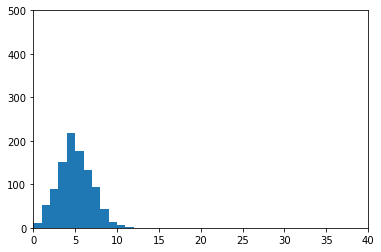

In [13]:
mfig,ax = plt.subplots()
mean = 5
xset = np.random.normal(5,2,size=1000)
histo = ax.hist(xset,bins=np.arange(0,40))
plt.xlim(0,40)
plt.ylim(0,500)

**How do we read that?** A histogram is a way to display our data. The x-axis is the value of our A1c. The y-axis is the *number of patients that had that A1c value*.

**The mean of healthy** We can find the mean A1c value in our healthy group pretty easily.

In [14]:
mean_a1c = np.mean(xset)
print('The mean A1c is: ' + str(mean_a1c))

The mean A1c is: 4.900321635868858


Now let's take a look at the dataset we got from our *diabetes* patients.

#### The diabetic A1c
We'll plot our diabetic dataset now in the same histogram format. The diabetic patients will have a *red* histogram while we'll keep our healthy patients in a *blue* histogram.

(0, 500)

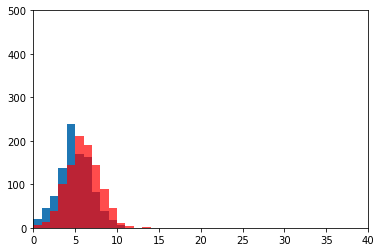

In [15]:
mfig,ax = plt.subplots()
mean = 5
healthy_data = np.random.normal(5,2,size=1000)
histo = ax.hist(healthy_data,bins=np.arange(0,40))

diabetic_data = np.random.normal(6,2,size=1000)
histo = ax.hist(diabetic_data,bins=np.arange(0,40),color='red',alpha=0.7)
plt.xlim(0,40)
plt.ylim(0,500)

So now we can take the mean of our *healthy* patients and the mean of our *diabetic* patients.

In [16]:
healthy_mean_a1c = np.mean(healthy_data)
print('The mean A1c in our healthy patients is: ' + str(healthy_mean_a1c))

diabetic_mean_a1c = np.mean(diabetic_data)
print('The mean A1c in our diabetic patients is: ' + str(diabetic_mean_a1c))

The mean A1c in our healthy patients is: 4.9843524400601344
The mean A1c in our diabetic patients is: 5.9511194152746905


So, the means are **different**. But is this difference **meaningful**? Or is it just because measurements are always full of errors? After all, maybe we thought someone wasn't diabetic when they actually were.

This is when we work with *statistical tests*.

#### Putting it all together with an interactive example

In [21]:
hm=5
hv=1
hset = np.random.normal(hm,hv,size=1000)


def update_distr(cutoff):
    fig = plt.figure()
    ax = fig.add_axes([0, 0, 1, 1])
    #ax.axis('off')
    
    #mfig,ax = plt.subplots()
    #ax.cla()
    histo = ax.hist(hset,bins=np.arange(0,40))
    line = ax.axvline(x=cutoff)
    #Fix up our plotting here
    plt.xlim(0,40)
    plt.ylim(0,500)
    
    plt.show()
    
    
    # Do some basic stats here
    pval = np.sum(hset > cutoff) / 1000
    print('Probability that we would see this datum value (or greater) from our healthy distribution: ' + str(pval))


w = interactive(update_distr, cutoff=(0.,20.))
display(w)

interactive(children=(FloatSlider(value=10.0, description='cutoff', max=20.0), Output()), _dom_classes=('widge…